<a href="https://colab.research.google.com/github/IndiaTJohnson/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Title: Prediction of Product Sales

- India Johnson

## Project Overview

## Load and Inspect Data

In [1]:
import pandas as pd

In [2]:
#Load in sales data from Google Drive
fpath = "/content/drive/MyDrive/Coding Dojo/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
#Create Dataframe
df_sales = pd.read_csv(fpath)

In [3]:
#Preview the Data
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#Check the first 5 rows of the dataframe
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

## **Initial Data Inspection**

In [5]:
#Count the number of rows and columns
len(df_sales)

8523

In [6]:
len(df_sales.columns)

12

In [7]:
df_sales.shape

(8523, 12)

In [8]:
#Examine the datatypes of each variable
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
#Discover any duplicates
df_sales.duplicated().sum()

0

In [10]:
#Count the number of unique values in each column
df_sales.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [11]:
#Percentage of unique values in each column
df_sales.nunique() / len(df_sales) * 100

Item_Identifier              18.291681
Item_Weight                   4.869178
Item_Fat_Content              0.058665
Item_Visibility              92.455708
Item_Type                     0.187727
Item_MRP                     69.670304
Outlet_Identifier             0.117330
Outlet_Establishment_Year     0.105597
Outlet_Size                   0.035199
Outlet_Location_Type          0.035199
Outlet_Type                   0.046932
Item_Outlet_Sales            40.983222
dtype: float64

### **Should the Product IDs be unique? I am not sure as the percent that is unique is VERY low and the data dictionary does not specify.**


## **Duplicates and Missing Values**

In [12]:
#Number of values in the Product IDs column that are duplicated
duplicated_ID = df_sales.duplicated(subset=["Item_Identifier"], keep = False)
duplicated_ID.sum()

8514

In [13]:
#Address duplicates

In [14]:
#Assess duplicated rows
duplicated_rows = df_sales.duplicated()
duplicated_rows

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [15]:
#Sum of duplicated rows
duplicated_rows.sum()

0

In [16]:
#Find any missing values

In [17]:
#Number of missing values from each column
null_value = df_sales.isna().sum()
null_value

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
#Percent of missing values from each column
null_percent = null_value/len(df_sales) * 100
null_percent

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

<Axes: >

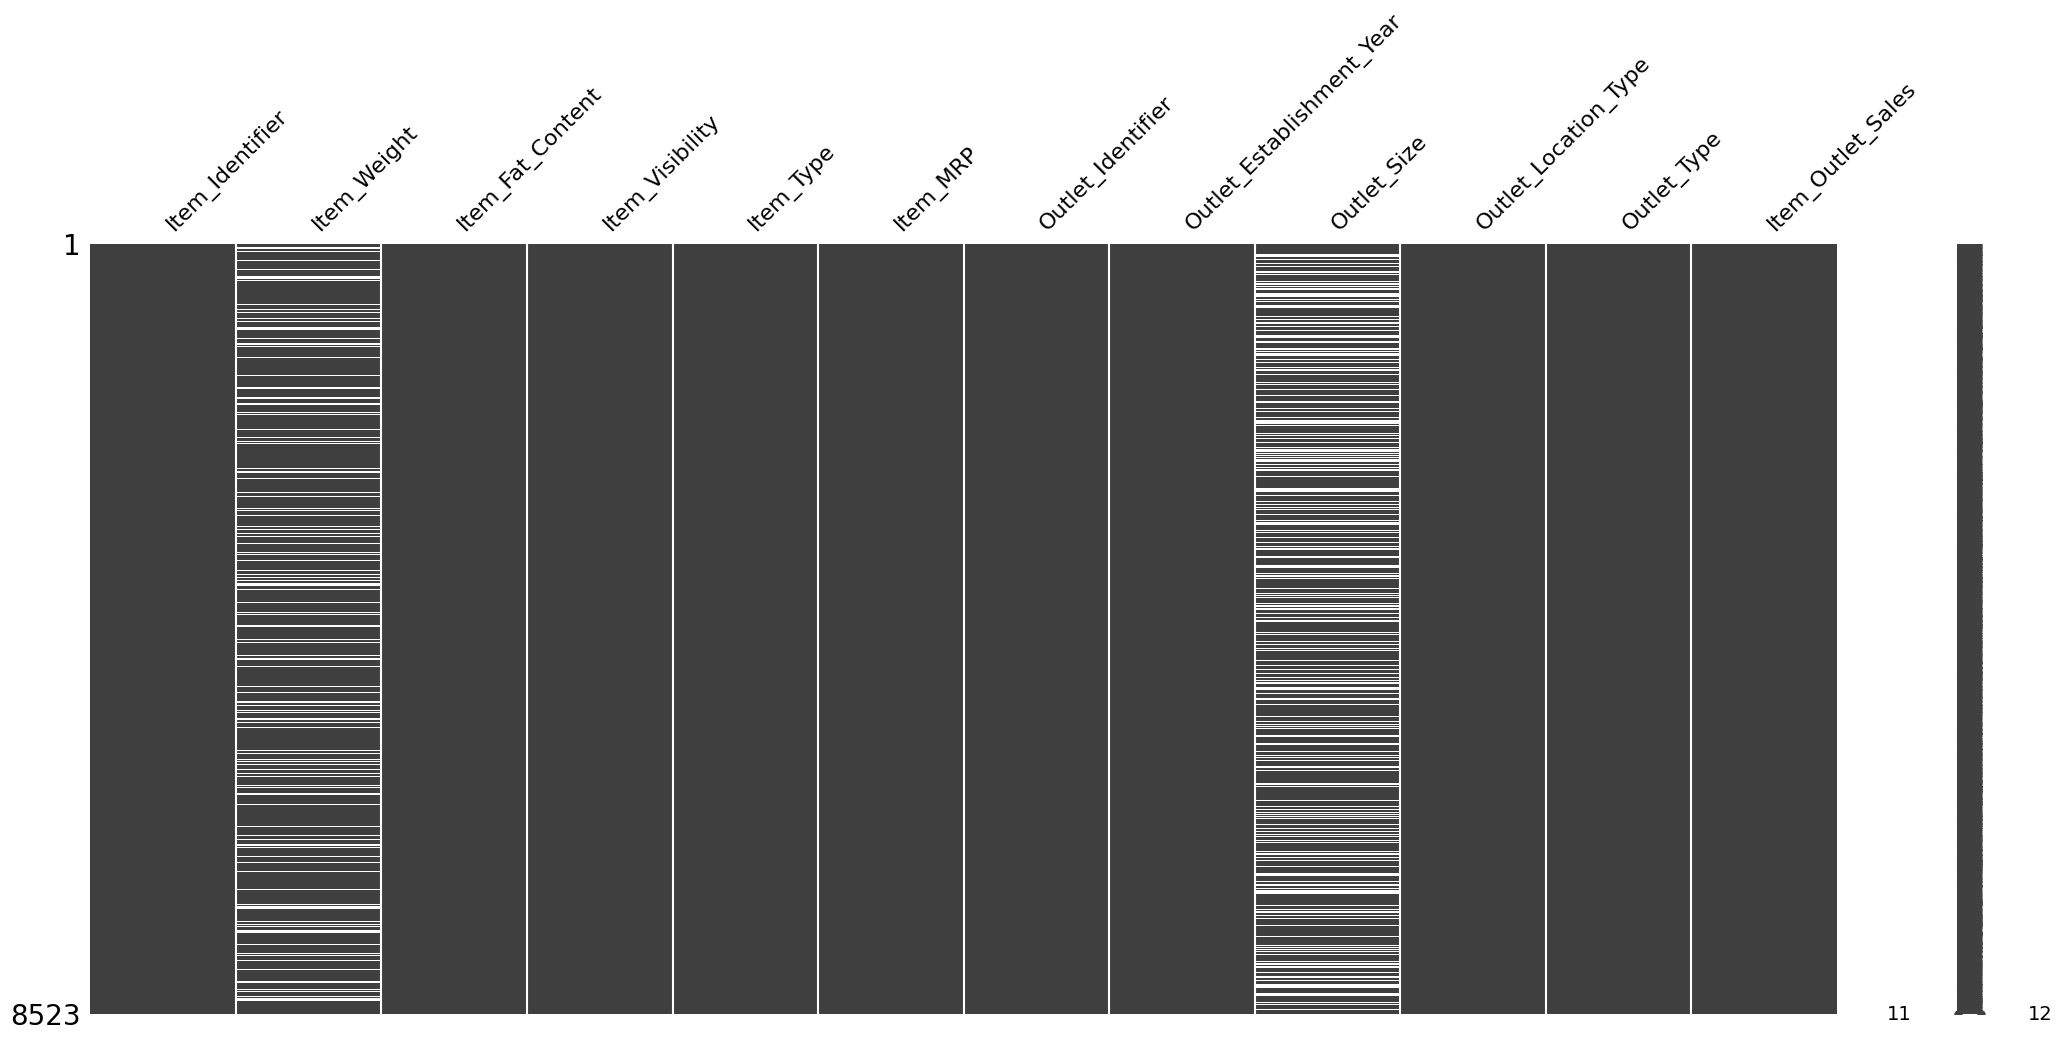

In [19]:
#Visualize missing values
import missingno as msno
msno.matrix(df_sales)

In [20]:
#Create variable for missing vlaues in Item Weight column
null_weight = df_sales["Item_Weight"].isna()

In [21]:
#Columns with NaN values for Item_Weight
df_sales[null_weight]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [22]:
#Create variables for filters for Item Weight and Outlet_Established_Year to establish connection
weight_filter = df_sales["Item_Weight"].isna()
year_filter = df_sales["Outlet_Establishment_Year"] == 1985

#Sum concurrent instances of missing item weight and year established being 1985
filters_combined = weight_filter & year_filter
filters_combined.sum()

1463

There appears to be a correlation between the weight of an item being missing and the outlet establishment year being 1985.

1985 may be the earliest the dataset can go or there could be another reason. I'll disregard this correlation for now.

In [23]:
#Show rows with null values for Outlet_Size and create variable
null_outletsize = df_sales["Outlet_Size"].isna()
df_sales[null_outletsize]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Item_Weight - float/numerical

Outlet_Size - string/categorical

In [24]:
#Add placeholder values for missing values

In [25]:
#Summarize Item_Weight column statistically
df_sales["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [26]:
#Fill missing item weights with -1
df_sales["Item_Weight"] = df_sales["Item_Weight"].fillna(-1)

In [27]:
#Fill missing Outlet_Size values with MISSING
df_sales["Outlet_Size"] = df_sales["Outlet_Size"].fillna("MISSING")

In [28]:
#Confirm all missing values have been dealt with
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## **Make categories consistant**

In [29]:
#Find inconsistant categories of data
#Create index variable that contains all string columns in dataframe
string_cols = df_sales.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [30]:
#Create loop that shows value counts for each string column in dataframe
for col in string_cols:
  print (f"Value Counts for {col}")
  print(df_sales[col].value_counts())
  print ('\n') #For readability

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [31]:
df_sales["Item_Fat_Content"] = df_sales['Item_Fat_Content'].replace({'LF':"Low Fat", 'reg':"Regular", 'low fat':"Low Fat"})

In [32]:
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

I wasn't sure if rounding was necessary or not.

In [33]:
#Round Item_MRP to nearest cent
df_sales['Item_MRP'] = df_sales['Item_MRP'].round(2)
df_sales['Item_MRP']

0       249.81
1        48.27
2       141.62
3       182.10
4        53.86
         ...  
8518    214.52
8519    108.16
8520     85.12
8521    103.13
8522     75.47
Name: Item_MRP, Length: 8523, dtype: float64

## **Summarize Cleaned Data**

In [34]:
#Isolate numerical columns
num_cols = df_sales.select_dtypes("number").columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [35]:
import numpy as np
from statistics import mode

In [36]:
#Summary Statistics of numerical columns
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992810,1997.831867,2181.288914
std,6.720742,0.051598,62.275166,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.825000,1987.000000,834.247400
50%,11.000000,0.053931,143.010000,1999.000000,1794.331000
75%,16.000000,0.094585,185.645000,2004.000000,3101.296400
max,21.350000,0.328391,266.890000,2009.000000,13086.964800


## **Exploratory Data Analysis**

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

### Show column data types for determining plot types.

In [65]:
#Show numeric only columns
df_sales.select_dtypes("number").columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [66]:
#Show only categroical columns
df_sales.select_dtypes("object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

## **Histograms**

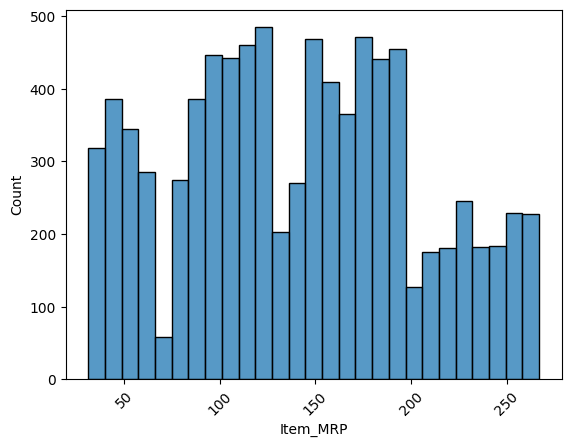

In [56]:
#Create a Histogram of Item_MRP
ax = sns.histplot(data=df_sales, x='Item_MRP')
ax.ticklabel_format(style='plain');
ax.tick_params(axis='x', rotation = 45);

## **Boxplots**

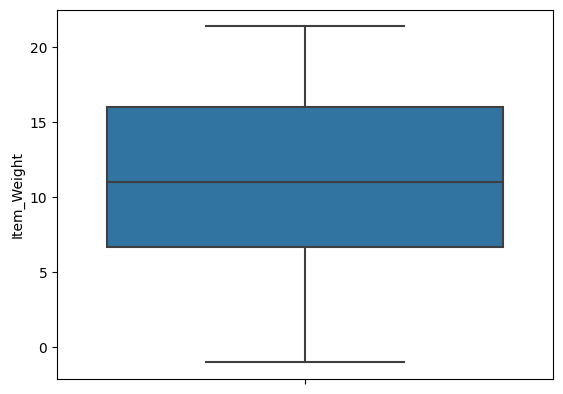

In [67]:
#Creating a Box plot of Item_Weights
ax = sns.boxplot(data=df_sales, y="Item_Weight")

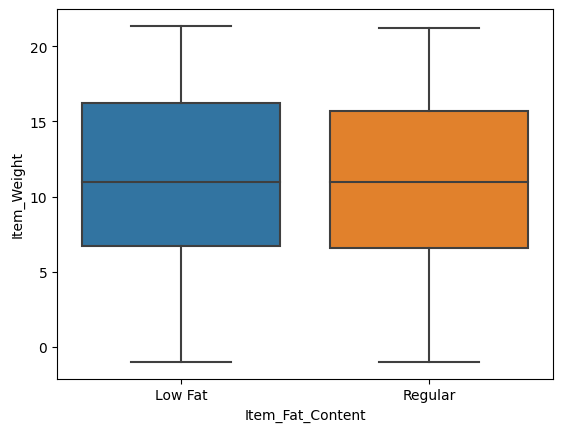

In [69]:
#Creating a Box Plot of Item_Weight relationship to Item_Fat_Content
ax = sns.boxplot(data=df_sales, x="Item_Fat_Content", y="Item_Weight")

## **Countplots**

In [61]:
# Saving the value_counts of Outlet_Establishment_Year to use with seaborn
val_counts = df_sales['Outlet_Establishment_Year'].value_counts()
val_counts.head(10)

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

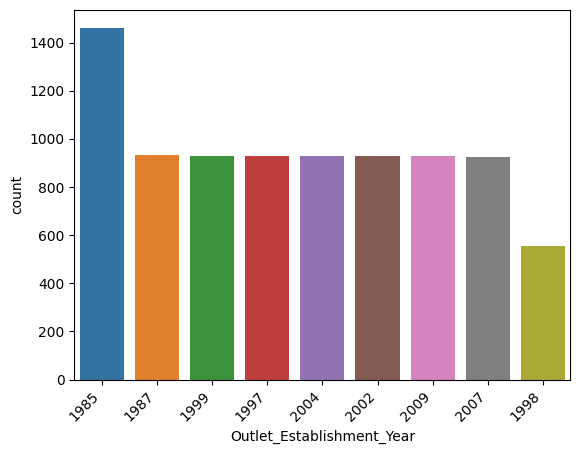

In [63]:
# Creating a Countplot with seaborn (ordered by count)
ax = sns.countplot(data=df_sales, x="Outlet_Establishment_Year",
                   order=val_counts.index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## **Bar Plots**

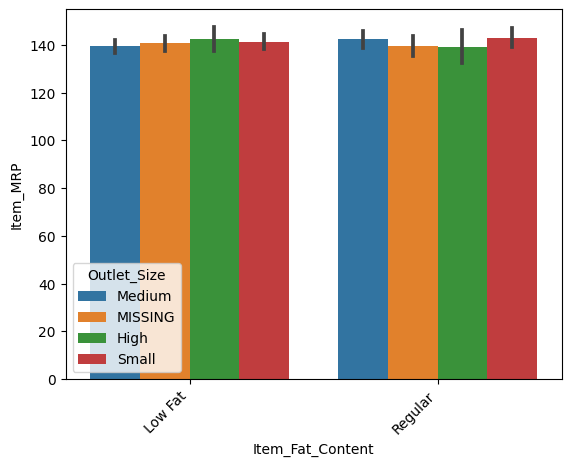

In [72]:
#Create a Grouped Bar Plot of Item_Fat_Content to Item_MRP
ax = sns.barplot(data=df_sales, x="Item_Fat_Content", y="Item_MRP", hue="Outlet_Size")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

## **Scatterplots**

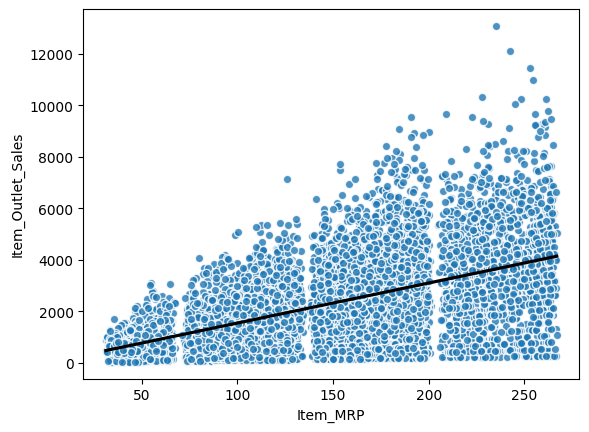

In [73]:
#Create scatter/regplot of Item_MRP v Item_Outlet_Sales with regression line
scatter_kws = dict(edgecolor='white')
line_kws=dict(color="Black")

ax = sns.regplot(data=df_sales, x="Item_MRP", y="Item_Outlet_Sales",
                 line_kws=line_kws, scatter_kws=scatter_kws);

## **Heatmap**

In [41]:
#Create correlation variable
corr = df_sales.corr(numeric_only=True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.54,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.07,-0.13
Item_MRP,0.02,-0.00,1.00,0.01,0.57
Outlet_Establishment_Year,0.54,-0.07,0.01,1.00,-0.05
Item_Outlet_Sales,-0.06,-0.13,0.57,-0.05,1.00


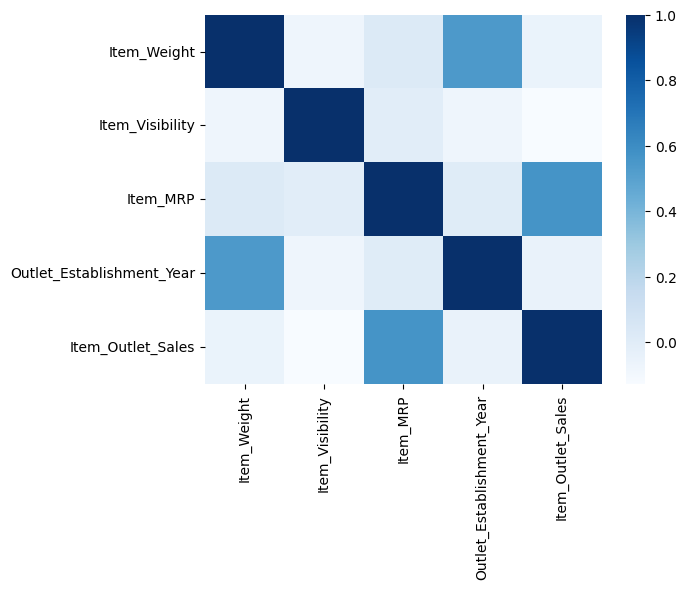

In [42]:
#Create Heatmap to show correlation between features
ax = sns.heatmap(corr, cmap = "Blues")

**## Feature Inspection**

# **To-Do:**
- All imports to top and label/comment
- Make sure everything is commented
- Clean Notebook - every code cell has comment, headers bold,
- Data Folder - trabsfer from Drive
- Plot RC defaults